## Dataset Overview 📊

This dataset contains transaction data intended for the analysis and detection of potential fraudulent activities. The data includes various attributes that provide insights into the transactional behavior, customer profiles, and other contextual details, making it suitable for applying different clustering and anomaly detection techniques.

### Key Features:
- **🆔 TransactionID:** A unique identifier for each transaction.
- **👤 AccountID:** A unique identifier for the account associated with the transaction.
- **💰 TransactionAmount:** The monetary value of each transaction, varying from small expenses to large purchases.
- **📅 TransactionDate:** The date and time when the transaction occurred.
- **🔄 TransactionType:** Categorical value indicating whether the transaction was a 'Credit' or 'Debit'.
- **📍 Location:** The geographic location where the transaction took place.
- **📱 DeviceID:** A unique identifier for the device used to perform the transaction.
- **🌐 IP Address:** The IP address associated with the transaction.
- **🏪 MerchantID:** A unique identifier for merchants involved in the transaction.
- **📡 Channel:** Indicates the channel through which the transaction was conducted (e.g., Online, ATM, Branch).
- **💵 AccountBalance:** The balance remaining in the account after the transaction.
- **⏱️ TransactionDuration:** Duration of the transaction in seconds.
- **🔐 LoginAttempts:** The number of login attempts made before the transaction.

### Objectives:
- **🕵️‍♂️ Fraud Detection:** Utilize clustering algorithms and anomaly detection techniques to identify potential fraudulent transactions.
- **📈 Behavioral Insights:** Gain insights into transactional behavior patterns to understand normal vs. anomalous behavior.

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #ff4500; padding: 10px; background-color: #ffe4e1; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ff4500; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Imports and Setup</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings("ignore")

# <span style="color:transparent;">Load and Explore Dataset</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #ff4500; padding: 10px; background-color: #ffe4e1; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ff4500; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Load and Explore Dataset</h1>
</div>

In [2]:
# Load the dataset
df = pd.read_csv('bank_transactions_dataset.csv')

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (2512, 16)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Ac

,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2512.0,297.593778,291.946243,0.26,81.885,211.14,414.5275,1919.11
CustomerAge,2512.0,44.673965,17.792198,18.00,27.000,45.00,59.0000,80.00
TransactionDuration,2512.0,119.643312,69.963757,10.00,63.000,112.50,161.0000,300.00
LoginAttempts,2512.0,1.124602,0.602662,1.00,1.000,1.00,1.0000,5.00
AccountBalance,2512.0,5114.302966,3900.942499,101.25,1504.370,4735.51,7678.8200,14977.99


An overview:

### Shape of the Dataset:
- Number of Rows: 2,512
- Number of Columns: 16

### Dataset Information:
- Total Columns: 16
- Numeric columns include `TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, and `AccountBalance`.
- Date columns like `TransactionDate` and `PreviousTransactionDate` will likely need to be converted to datetime objects for time-series analysis.
- Categorical columns include fields like `TransactionType`, `Location`, `Channel`, etc.

### Statistical Summary:
- The mean transaction amount is approximately 297.59.
- `CustomerAge` ranges from 18 to 80, with an average age of approximately 44.67.
- `AccountBalance` ranges significantly, with a maximum of around 14,978. 


In [4]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


- There are no missing values or duplicated entries in the dataset.

# <span style="color:transparent;">Unique Value Exploration</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #ff4500; padding: 10px; background-color: #ffe4e1; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ff4500; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Unique Value Exploration</h1>
</div>

In [5]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


In [6]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


In [7]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: TransactionID
Unique Values: ['TX000001' 'TX000002' 'TX000003' ... 'TX002510' 'TX002511' 'TX002512']

Column: AccountID
Unique Values: ['AC00128' 'AC00455' 'AC00019' 'AC00070' 'AC00411' 'AC00393' 'AC00199'
 'AC00069' 'AC00135' 'AC00385' 'AC00150' 'AC00459' 'AC00392' 'AC00264'
 'AC00085' 'AC00270' 'AC00317' 'AC00359' 'AC00242' 'AC00285' 'AC00002'
 'AC00014' 'AC00095' 'AC00453' 'AC00241' 'AC00041' 'AC00441' 'AC00057'
 'AC00390' 'AC00313' 'AC00367' 'AC00291' 'AC00060' 'AC00365' 'AC00267'
 'AC00404' 'AC00202' 'AC00478' 'AC00405' 'AC00421' 'AC00480' 'AC00120'
 'AC00117' 'AC00011' 'AC00401' 'AC00282' 'AC00439' 'AC00296' 'AC00471'
 'AC00159' 'AC00482' 'AC00115' 'AC00055' 'AC00419' 'AC00374' 'AC00271'
 'AC00456' 'AC00143' 'AC00427' 'AC00438' 'AC00425' 'AC00325' 'AC00434'
 'AC00319' 'AC00460' 'AC00461' 'AC00395' 'AC00217' 'AC00053' 'AC00110'
 'AC00265' 'AC00239' 'AC00007' 'AC00022' 'AC00464' 'AC00406' 'AC00445'
 'AC00236' 'AC00220' 'AC00140' 'AC00098' 'AC00303' 'AC00373' 'AC00437'
 'AC

Insights from the unique value analysis:

### Column Types:
- **Numerical Columns:** `['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']`
- **Categorical Columns:** `['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']`

### Unique Values for Categorical Columns:
- **TransactionID:** 2512 unique values (each transaction is unique).
- **TransactionType:** `['Debit', 'Credit']`
- **Location:** 100 unique U.S. city names.
- **Channel:** `['ATM', 'Online', 'Branch']`
- **CustomerOccupation:** `['Doctor', 'Student', 'Retired', 'Engineer']`
- **AccountID, DeviceID, MerchantID, IP Address, TransactionDate, PreviousTransactionDate:** Each has many unique values indicating specific identifiers or timestamps.


# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #ff4500; padding: 10px; background-color: #ffe4e1; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ff4500; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Exploratory Data Analysis (EDA)</h1>
</div>

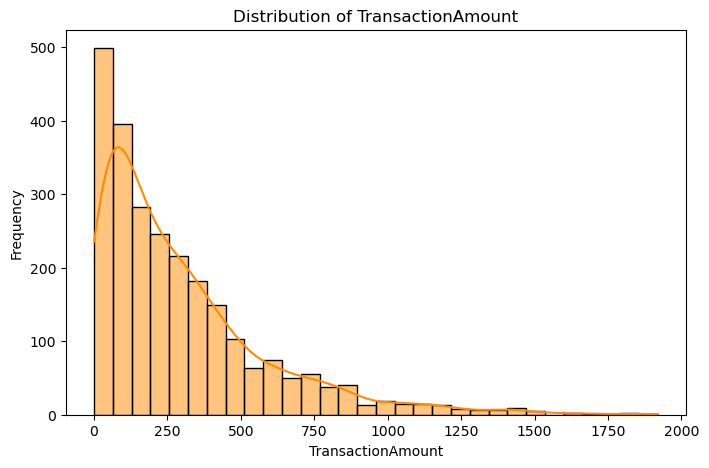

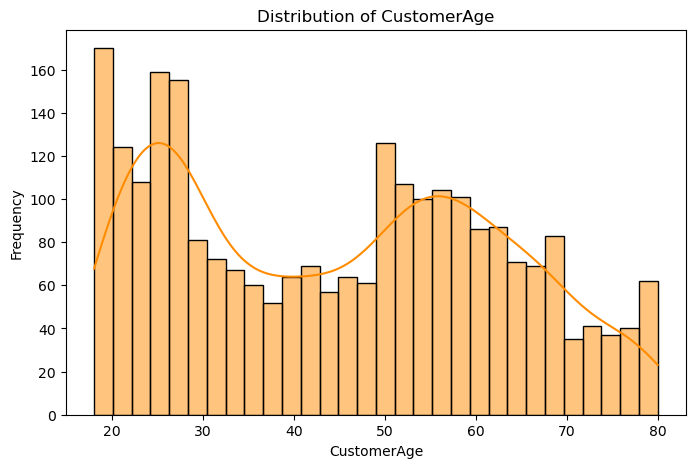

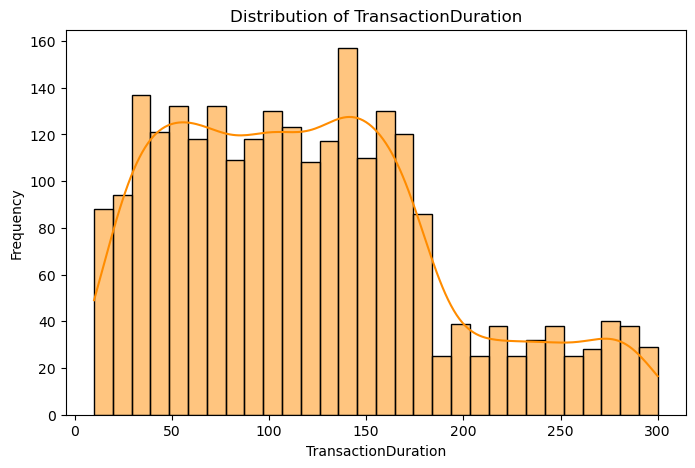

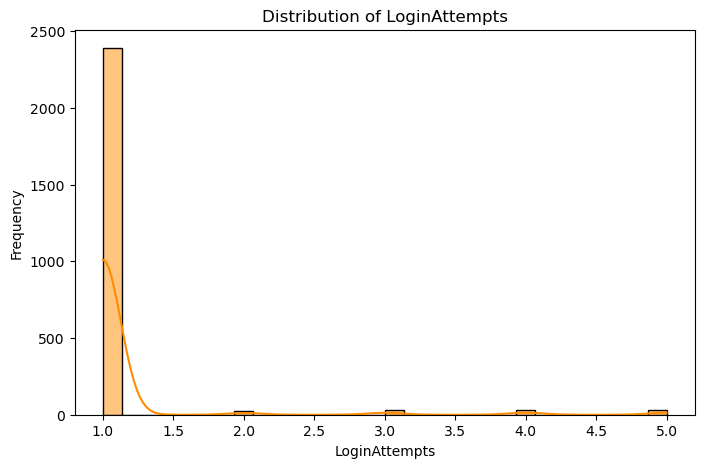

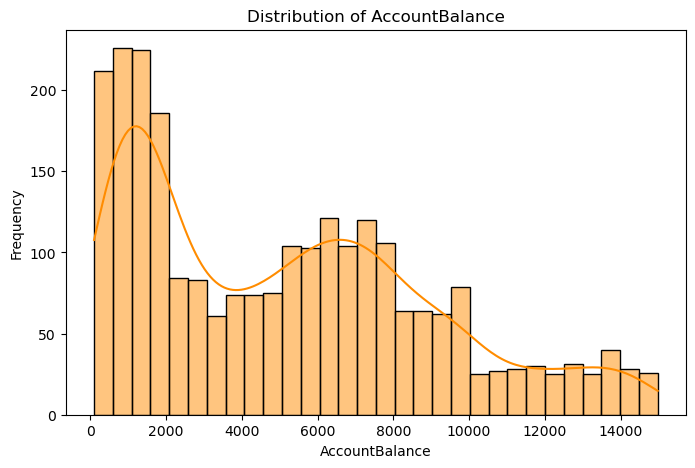

In [8]:
def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        # Create a histogram with KDE
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plot_histograms(df, numerical_columns)

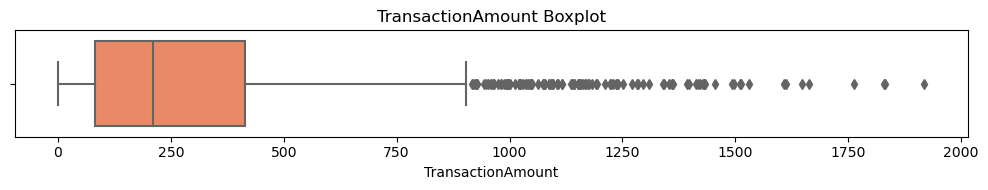


Summary Statistics for TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


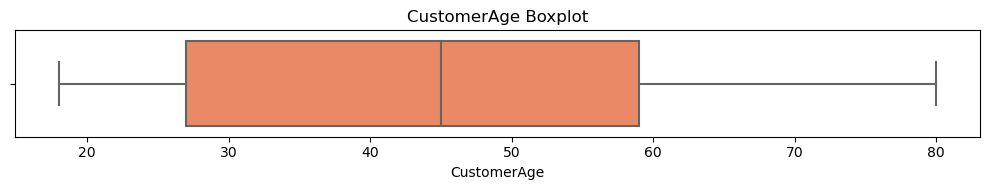


Summary Statistics for CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


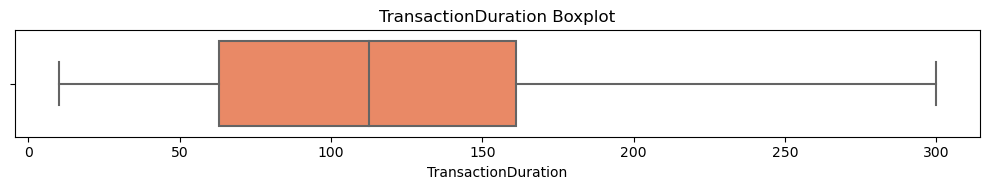


Summary Statistics for TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


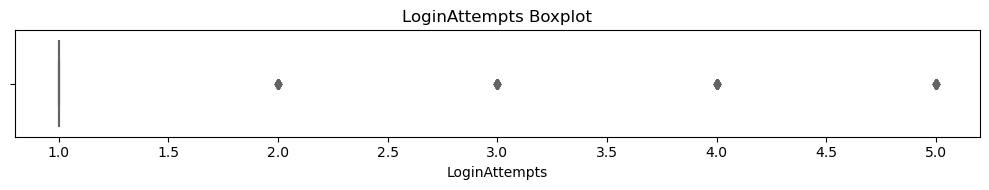


Summary Statistics for LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


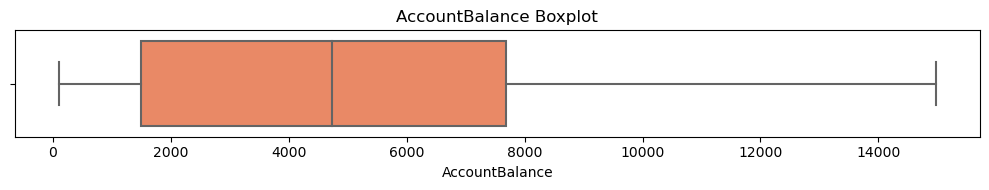


Summary Statistics for AccountBalance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [9]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    # Create a boxplot with the specified color
    sns.boxplot(x=data[column], color='coral')  
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics for the specified column
    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for column in numerical_columns:
    univariate_analysis(df, column, column.replace('_', ' '))

Insights:

### 1. **TransactionAmount:**
   - The distribution shows a number of outliers, with many values lying significantly above the upper quartile. 
   - **Summary Statistics:**
     - **Count:** 2512
     - **Mean:** Approximately 297.59
     - **Median (50%):** 211.14
     - **Min:** 0.26
     - **Max:** 1919.11
   - The data contains some extremely high transaction amounts, indicating potential outliers that could be worth investigating for anomalies or fraud detection. The median is much lower than the mean, reinforcing the skewed distribution observed previously.

### 2. **CustomerAge:**
   - The spread is relatively even without significant outliers. The age distribution is bounded between 18 and 80.
   - **Summary Statistics:**
     - **Count:** 2512
     - **Mean:** Approximately 44.67
     - **Median (50%):** 45.00
     - **Min:** 18
     - **Max:** 80
   - This suggests a fairly balanced range of customer ages, with most users falling around the middle-aged group. There are no extreme outliers or significant deviations in this data.

### 3. **TransactionDuration:**
   - A number of outliers are present at the higher end, indicating some transactions that take significantly longer than typical durations.
   - **Summary Statistics:**
     - **Count:** 2512
     - **Mean:** Approximately 119.64 seconds
     - **Median (50%):** 112.50 seconds
     - **Min:** 10 seconds
     - **Max:** 300 seconds
   - Most transactions are completed in a relatively short duration, while a subset takes considerably longer. This may hint at special transaction types, potential system delays, or other factors.

### 4. **LoginAttempts:**
   - The distribution shows a high concentration at 1, with only a few instances of higher login attempts. There are a few outliers with more than 1 attempt.
   - **Summary Statistics:**
     - **Count:** 2512
     - **Mean:** Approximately 1.12
     - **Median (50%):** 1.00
     - **Min:** 1
     - **Max:** 5
   - Most users successfully log in on their first attempt. Higher values, which are rare, may indicate suspicious behavior such as failed login attempts, warranting further security scrutiny.

### 5. **AccountBalance:**
   - There are several high-value outliers, indicating a wide range of account balances, with many accounts having balances far exceeding the upper quartile.
   - **Summary Statistics:**
     - **Count:** 2512
     - **Mean:** Approximately 5114.30
     - **Median (50%):** 4735.51
     - **Min:** 101.25
     - **Max:** 14977.99
   - While most account balances are moderate, a few high-value accounts significantly skew the data. These accounts may require monitoring for any large or unusual transactions that deviate from typical behavior.

### Summary:
The analysis highlights that most numerical data has a skewed distribution with a significant number of outliers for features like `TransactionAmount`, `TransactionDuration`, and `AccountBalance`. `CustomerAge` is relatively stable, while `LoginAttempts` tends to cluster around a single value. 

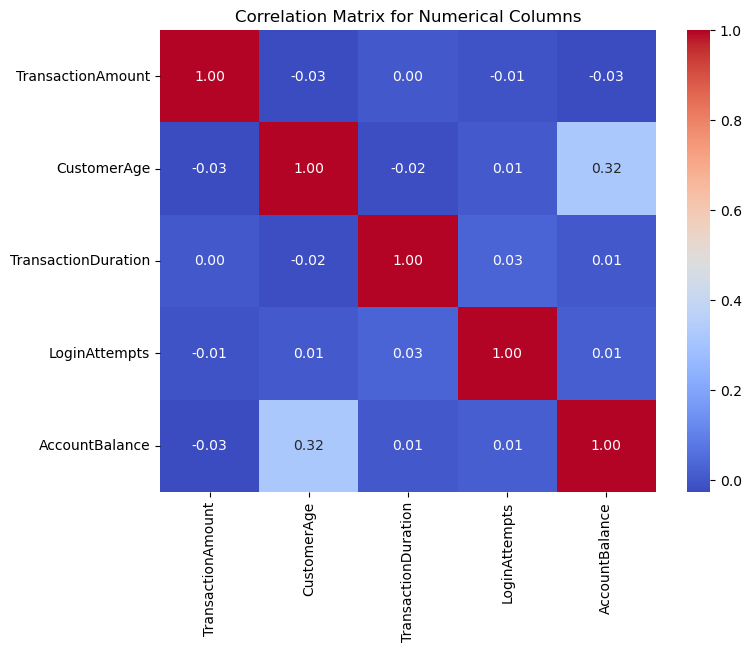

In [10]:
# Display correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

### Correlation Matrix Observations:

1. **TransactionAmount vs. AccountBalance (Positive Correlation):**
   - There is a moderate positive correlation between `TransactionAmount` and `AccountBalance`. 
   - As the `TransactionAmount` increases, the `AccountBalance` also tends to be higher. This may indicate that users with higher balances are likely to make larger transactions, which is an expected financial behavior.

2. **CustomerAge (Low/No Correlation):**
   - `CustomerAge` shows low or near-zero correlation with other variables, including `TransactionAmount`, `TransactionDuration`, `LoginAttempts`, and `AccountBalance`.
   - This suggests that age does not have a strong linear relationship with the transaction-related features. Users' age does not significantly influence transaction amounts, balance, or login behavior in a predictable way.

3. **TransactionDuration (Weak to Moderate Positive Correlation with TransactionAmount):**
   - There is a weak positive correlation between `TransactionDuration` and `TransactionAmount`.
   - Longer transaction durations may be slightly associated with larger transaction amounts, potentially reflecting more complex or secure transactions (e.g., online approvals or security checks for higher amounts).

4. **LoginAttempts (Low/No Correlation):**
   - `LoginAttempts` shows low or no correlation with the other numerical features.
   - This indicates that the number of login attempts does not have a linear relationship with `TransactionAmount`, `CustomerAge`, `TransactionDuration`, or `AccountBalance`. High or low login attempts may therefore be more indicative of user-specific behaviors or security issues rather than transactional trends.

5. **AccountBalance (Weak to Moderate Positive Correlation with TransactionDuration):**
   - There is a weak positive correlation between `AccountBalance` and `TransactionDuration`.
   - Accounts with higher balances may have slightly longer transaction durations, potentially due to additional verification steps or complexities in their transactions.

### General Insights:
- Most of the numerical variables show weak to moderate correlations with one another, indicating that the variables are relatively independent in terms of linear relationships.


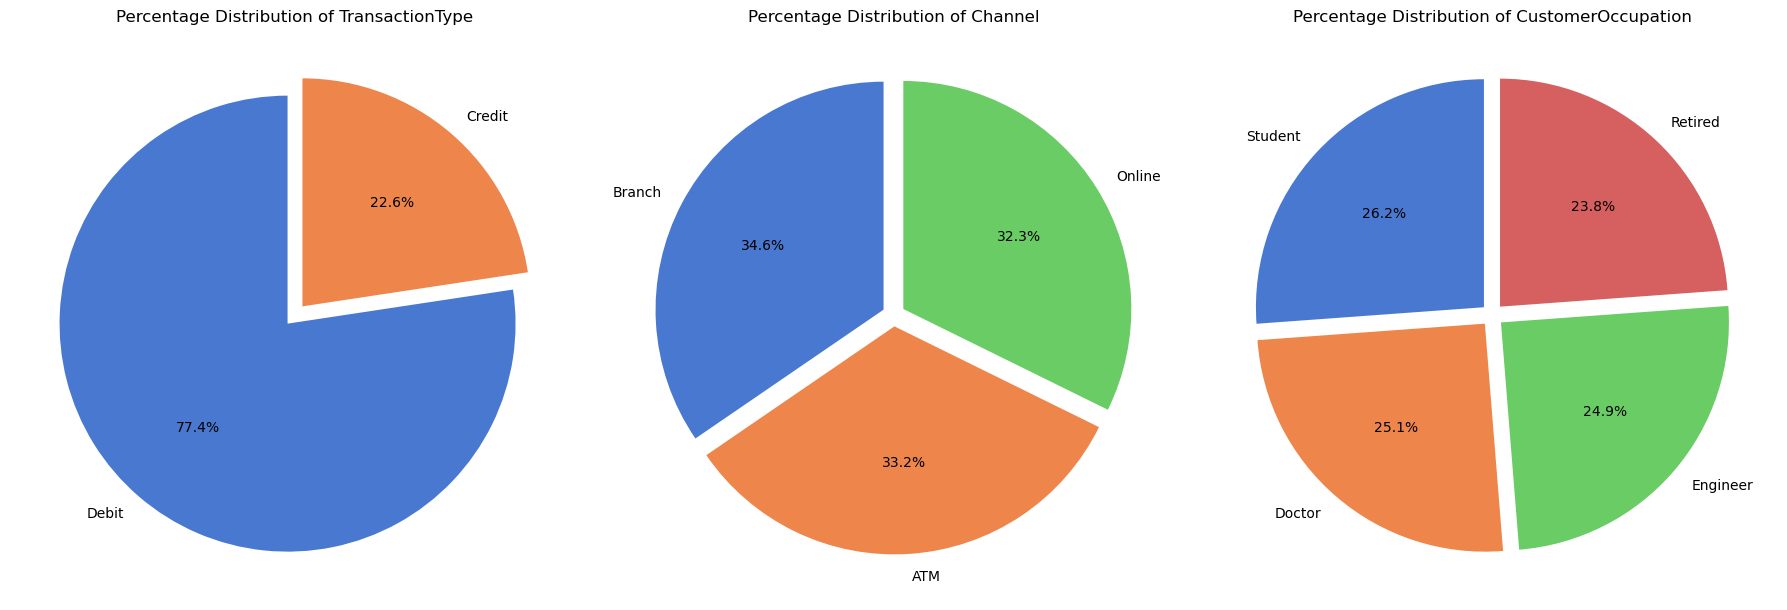

In [11]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))  
    
    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                               startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['TransactionType', 'Channel', 'CustomerOccupation']
plot_categorical_distributions(columns_to_plot)

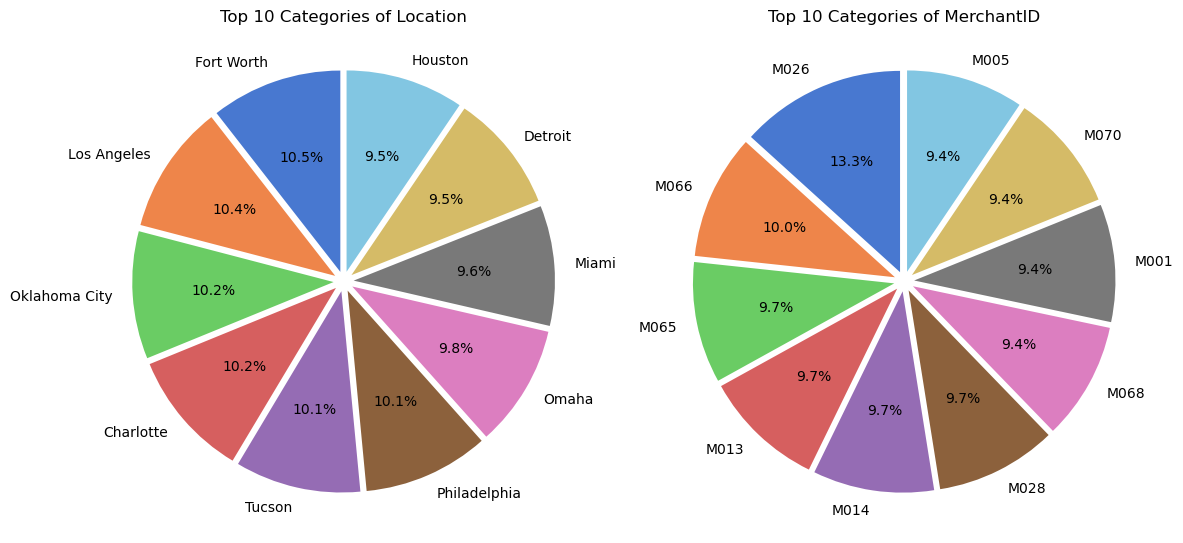

In [12]:
def plot_top_categories_pie_charts(columns, data=df, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))  
    
    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)  
        
        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)
        
        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                                 startangle=90, explode=[0.05] * len(top_categories))
        
        plt.title(f'Top 10 Categories of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['Location', 'MerchantID']
plot_top_categories_pie_charts(columns_to_plot)


Number of high-value transactions (top 5%): 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51
82,TX000083,AC00236,922.55,2023-01-23 16:32:48,Debit,Detroit,D000206,21.97.154.92,M004,ATM,63,Retired,87,1,4715.84,2024-11-04 08:11:07
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53
110,TX000111,AC00068,1045.22,2023-11-22 16:13:39,Debit,Columbus,D000400,77.7.223.184,M077,ATM,53,Retired,73,1,1829.90,2024-11-04 08:07:35
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24


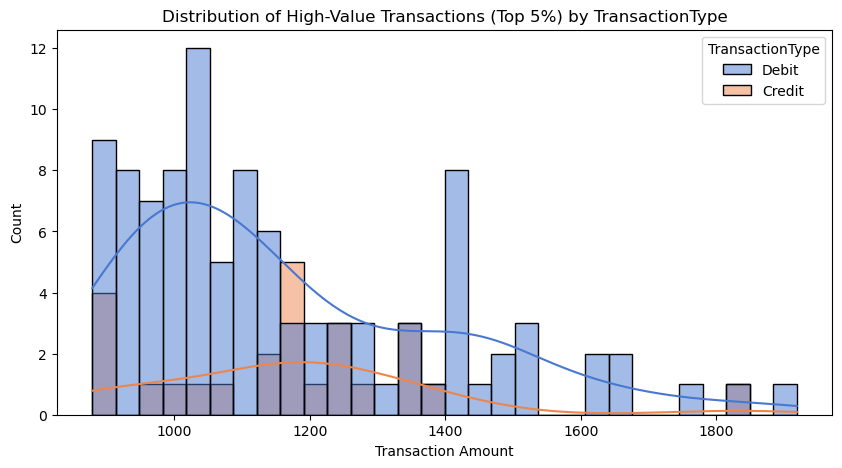

In [15]:
high_value_threshold = df['TransactionAmount'].quantile(0.95)
high_value_transactions = df[df['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
# Adding TransactionType as hue for high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='TransactionType', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.show()



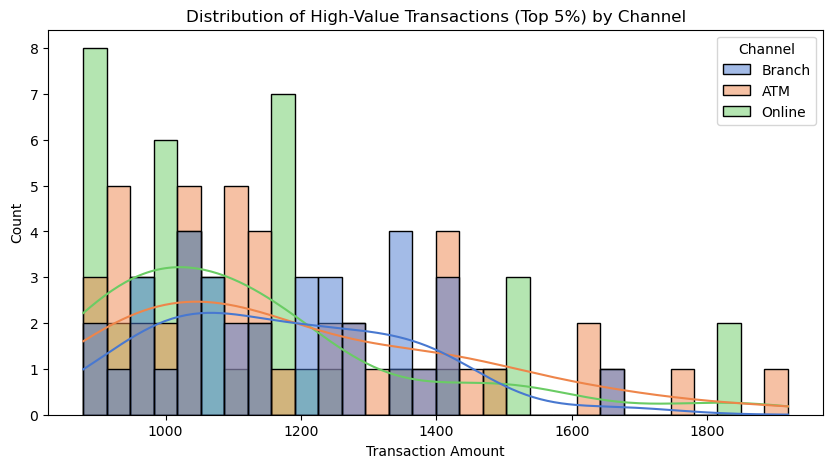

In [16]:
# Plotting high-value transactions with 'Channel' as hue
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='Channel', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.show()


Number of frequent transactions (within 1 hour): 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,Detroit,D000238,38.210.156.148,M017,Branch,28,Student,48,1,117.98,2024-11-04 08:08:18,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,Sacramento,D000038,135.29.211.116,M018,Branch,69,Doctor,156,1,7885.21,2024-11-04 08:08:27,2480.0


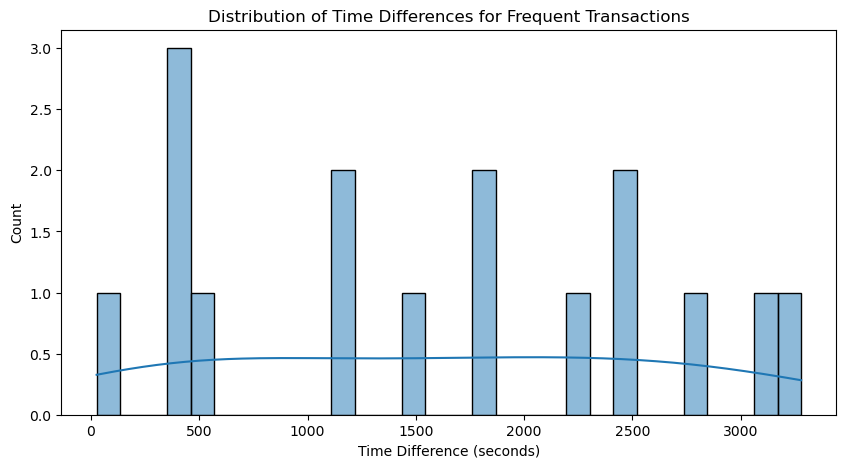

In [17]:
# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Sort data by AccountID and TransactionDate
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])

# Calculate time difference between consecutive transactions for each account
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Identify frequent transactions with short intervals (e.g., within 1 hour)
short_interval_threshold = 3600  # 1 hour in seconds
frequent_transactions = df_sorted[df_sorted['TimeDifference'] <= short_interval_threshold]

# Display the number and preview of frequent transactions
print(f"Number of frequent transactions (within 1 hour): {len(frequent_transactions)}")
display(frequent_transactions.head())

# Plot the distribution of time differences for visualization
plt.figure(figsize=(10, 5))
sns.histplot(frequent_transactions['TimeDifference'], bins=30, kde=True)
plt.title('Distribution of Time Differences for Frequent Transactions')
plt.xlabel('Time Difference (seconds)')
plt.show()


- This analysis can help identify accounts with rapid transaction sequences, which may be indicative of automated transactions, potential fraud, or unusual activity patterns.

Number of transactions with large balance changes: 125


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09,13323.79
34,TX000035,AC00365,255.26,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,45,Doctor,50,1,14815.87,2024-11-04 08:10:51,15071.13
41,TX000042,AC00480,34.02,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,38,Doctor,19,1,14214.48,2024-11-04 08:11:45,14180.46
42,TX000043,AC00120,241.42,2023-04-20 18:57:43,Credit,Charlotte,D000198,60.89.202.192,M044,Online,57,Doctor,116,1,13357.02,2024-11-04 08:09:03,13598.44


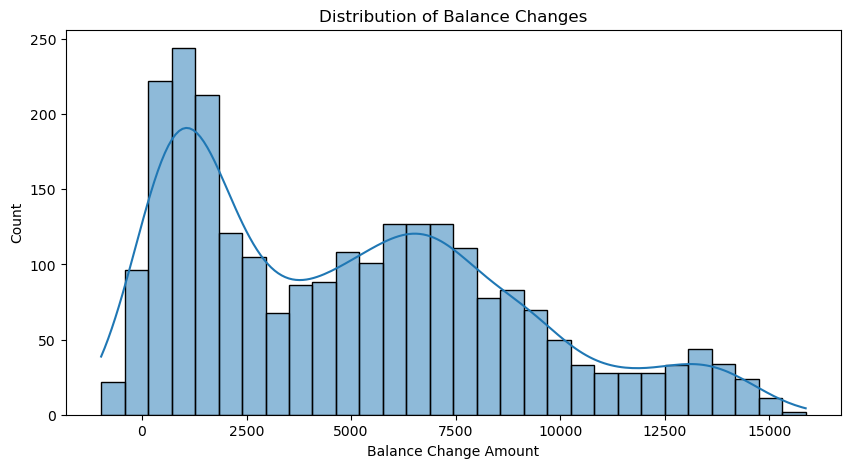

In [18]:
# Calculate change in AccountBalance for each transaction, considering TransactionType
df['BalanceChange'] = df.apply(
    lambda row: row['AccountBalance'] - row['TransactionAmount'] if row['TransactionType'] == 'Debit' 
    else row['AccountBalance'] + row['TransactionAmount'],
    axis=1
)

# Identify large balance changes based on threshold (e.g., 2 standard deviations)
balance_change_threshold = df['BalanceChange'].mean() + 2 * df['BalanceChange'].std()
large_balance_changes = df[df['BalanceChange'].abs() > balance_change_threshold]
print(f"Number of transactions with large balance changes: {len(large_balance_changes)}")
display(large_balance_changes.head())

# Visualize balance changes
plt.figure(figsize=(10, 5))
sns.histplot(df['BalanceChange'], bins=30, kde=True)
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change Amount')
plt.show()


- This approach captures unusual transactions by identifying large deviations in balance changes, accounting for transaction types. It helps flag potential fraud based on substantial deviations from typical account behavior.

Number of transactions with more than one login attempt: 122


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,1056.66
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,426.42
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,9293.70
38,TX000039,AC00478,795.31,2023-10-12 17:07:40,Debit,Mesa,D000077,49.29.37.185,M048,ATM,66,Doctor,90,2,7914.88,2024-11-04 08:11:17,7119.57
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,3911.03


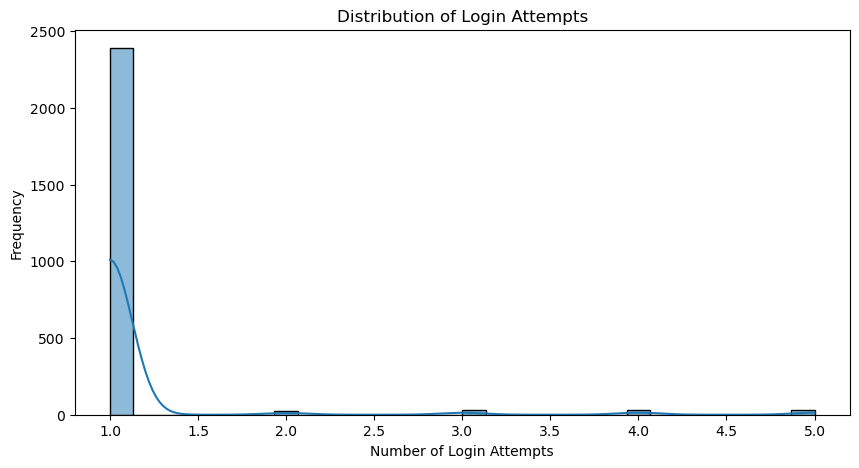

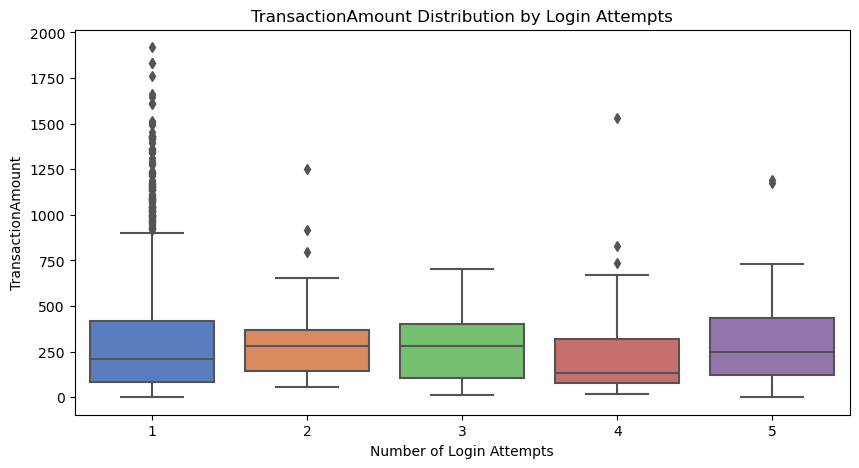

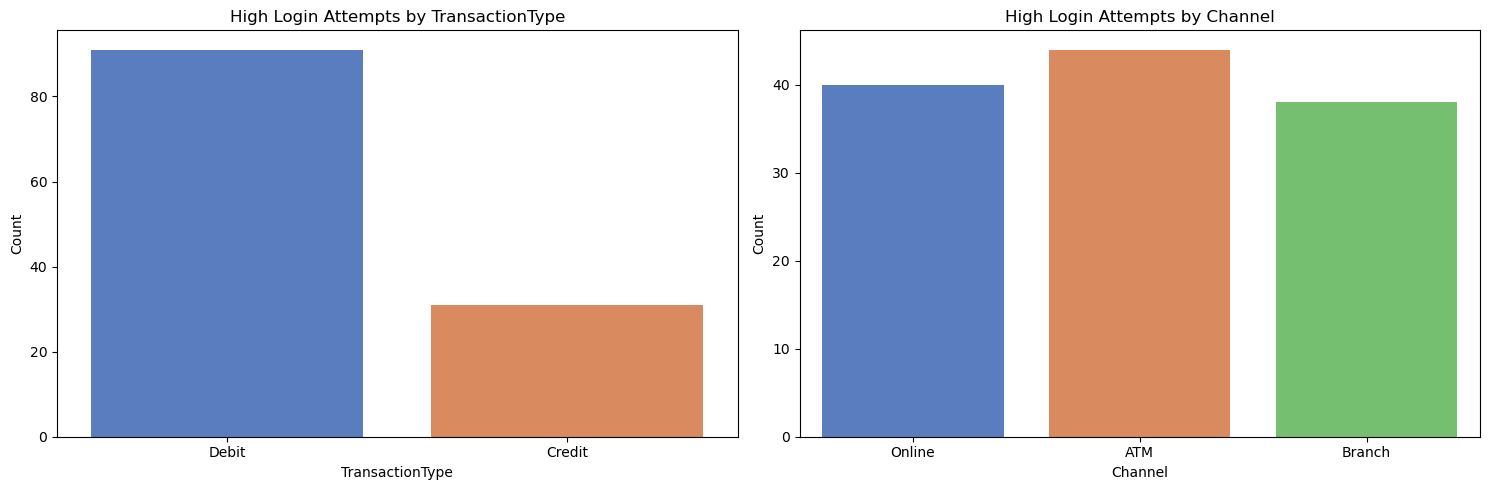

In [19]:
# Transactions with more than one login attempt
high_login_attempts = df[df['LoginAttempts'] > 1]
print(f"Number of transactions with more than one login attempt: {len(high_login_attempts)}")
display(high_login_attempts.head())

# Distribution of Login Attempts
plt.figure(figsize=(10, 5))
sns.histplot(df['LoginAttempts'], bins=30, kde=True)
plt.title('Distribution of Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Frequency')
plt.show()

# Relationship between Login Attempts and TransactionAmount
plt.figure(figsize=(10, 5))
sns.boxplot(x='LoginAttempts', y='TransactionAmount', data=df, palette='muted')
plt.title('TransactionAmount Distribution by Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('TransactionAmount')
plt.show()

# Analyzing high login attempts with respect to TransactionType and Channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=high_login_attempts, x='TransactionType', palette='muted')
plt.title('High Login Attempts by TransactionType')
plt.xlabel('TransactionType')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=high_login_attempts, x='Channel', palette='muted')
plt.title('High Login Attempts by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


- This analysis can help uncover potential patterns, such as whether certain transaction channels or types are more prone to multiple login attempts, which may raise security concerns.

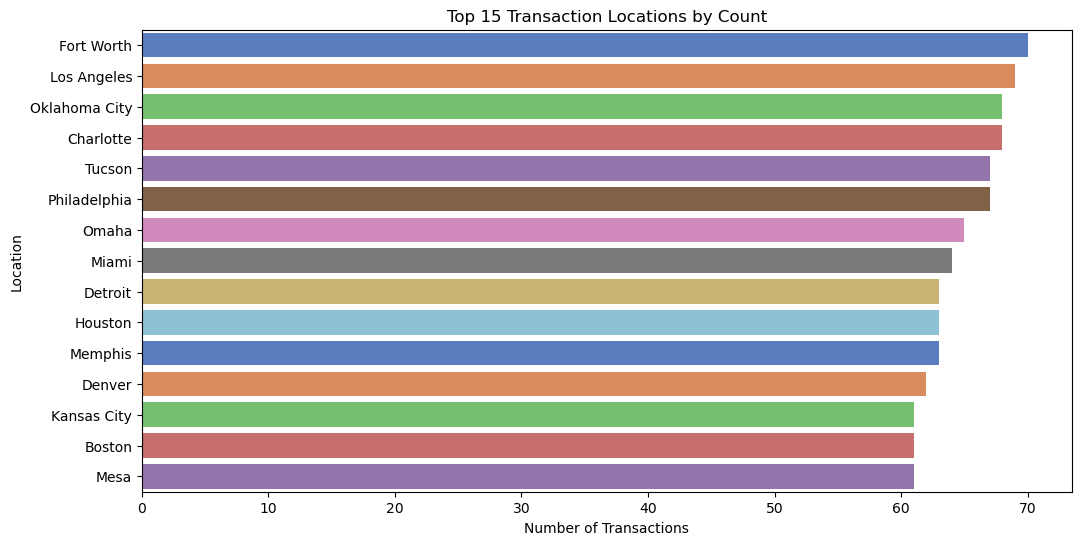

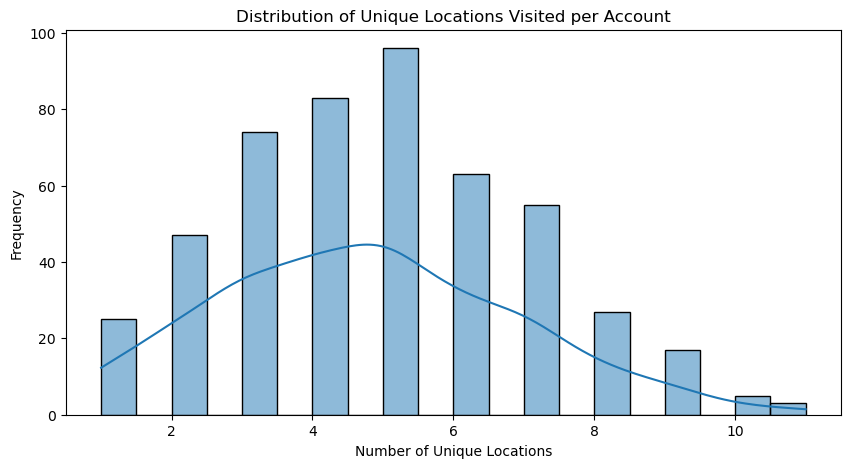


Number of accounts with transactions from multiple locations: 349


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,UniqueLocations
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,5098.12,7
1,TX000402,AC00128,137.35,2023-03-29 18:12:17,Credit,Sacramento,D000051,37.213.85.222,M028,Online,40,Doctor,220,1,12662.66,2024-11-04 08:10:23,12800.01,7
2,TX000488,AC00128,710.14,2023-03-08 16:20:43,Debit,El Paso,D000667,83.207.115.164,M059,ATM,26,Student,227,1,465.63,2024-11-04 08:12:20,-244.51,7
3,TX001282,AC00128,1397.59,2023-11-13 17:28:12,Credit,Austin,D000117,4.134.78.167,M020,ATM,26,Student,144,1,1134.79,2024-11-04 08:06:38,2532.38,7
4,TX001757,AC00128,34.67,2023-04-25 16:34:55,Debit,Chicago,D000321,78.100.105.143,M077,Online,19,Student,71,1,888.60,2024-11-04 08:11:38,853.93,7



Identifying Accounts with Significant Location Shifts:


,AccountID,UniqueLocations
1,AC00002,7
2,AC00003,5
3,AC00004,9
4,AC00005,9
6,AC00007,5
8,AC00009,5
9,AC00010,7
10,AC00011,5
11,AC00012,6
12,AC00013,7


In [20]:
# Distribution of Transactions by Location
plt.figure(figsize=(12, 6))
top_locations = df['Location'].value_counts().nlargest(15)  # Show top 15 locations for clarity
sns.barplot(x=top_locations.values, y=top_locations.index, palette='muted')
plt.title('Top 15 Transaction Locations by Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.show()

# Count unique locations per AccountID
location_counts_per_account = df.groupby('AccountID')['Location'].nunique().reset_index()
location_counts_per_account.columns = ['AccountID', 'UniqueLocations']
plt.figure(figsize=(10, 5))
sns.histplot(location_counts_per_account['UniqueLocations'], bins=20, kde=True)
plt.title('Distribution of Unique Locations Visited per Account')
plt.xlabel('Number of Unique Locations')
plt.ylabel('Frequency')
plt.show()

# Merge unique location counts back to the original DataFrame
location_counts = df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location': 'UniqueLocations'})
uncommon_location_transactions = df.merge(location_counts, on='AccountID')
# Filter for accounts with more than 3 unique locations
uncommon_location_transactions = uncommon_location_transactions[uncommon_location_transactions['UniqueLocations'] > 3]
# Display results for accounts with transactions from multiple locations
print(f"\nNumber of accounts with transactions from multiple locations: {len(uncommon_location_transactions['AccountID'].unique())}")
display(uncommon_location_transactions.head())

# Identifying Accounts with Significant Location Shifts (duplicate logic removed)
print(f"\nIdentifying Accounts with Significant Location Shifts:")
significant_location_shifts = location_counts[location_counts['UniqueLocations'] > 3]
display(significant_location_shifts.head(10))


- This approach can help identify accounts exhibiting rapid or unusual location changes, which may indicate fraud, automated activity, or compromised accounts.

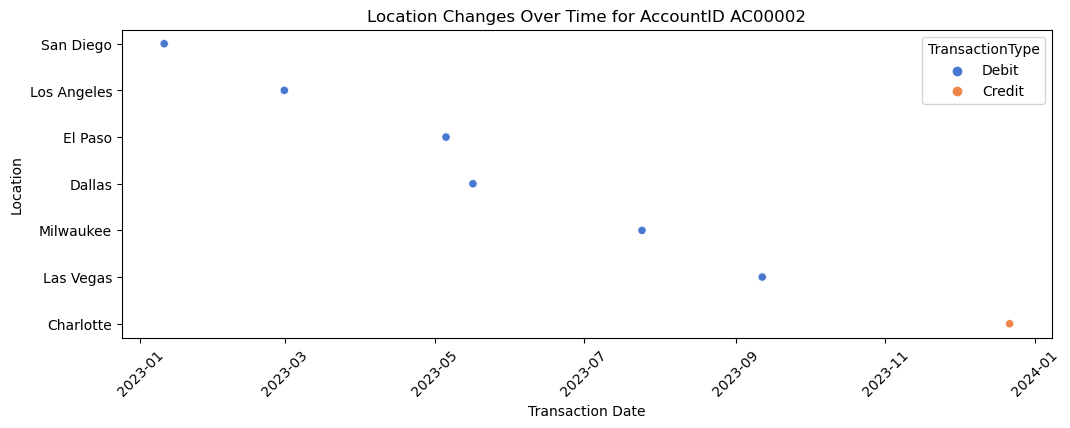

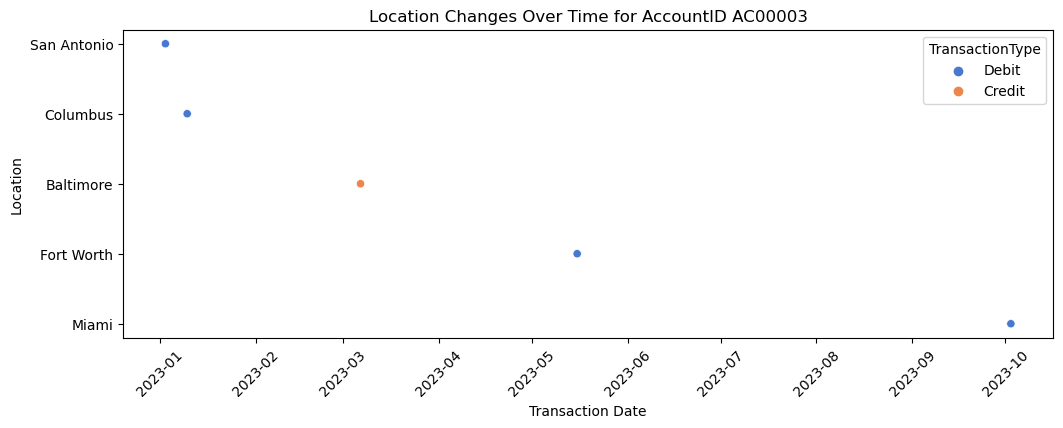

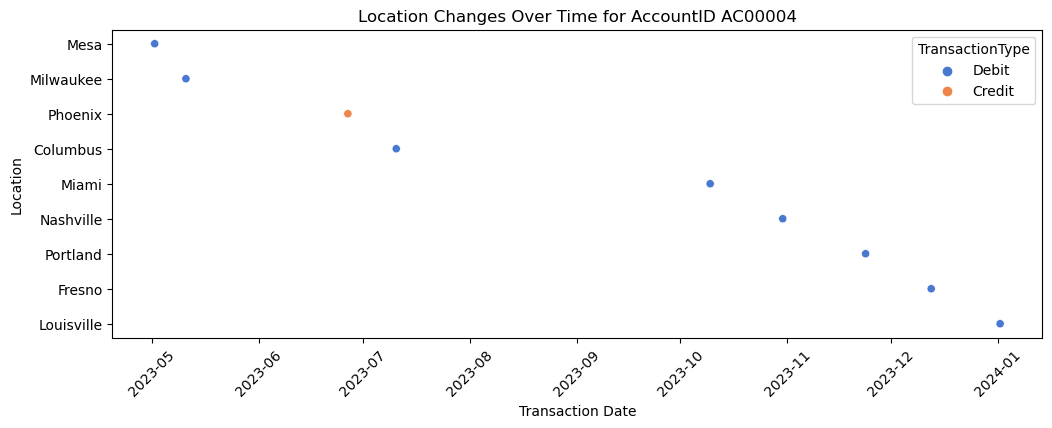

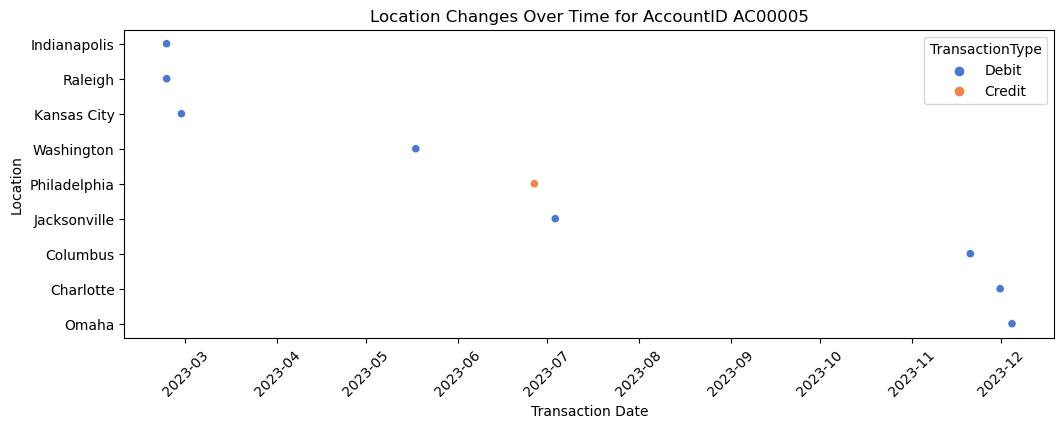

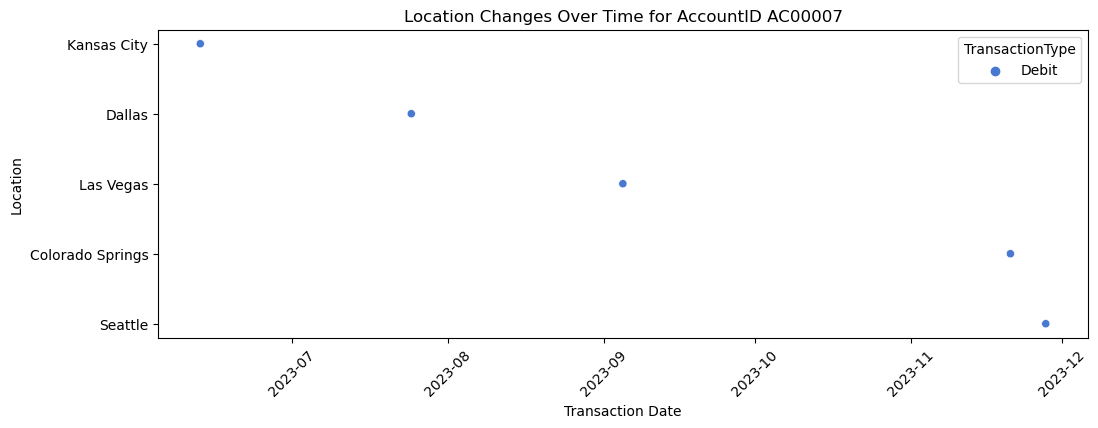

In [21]:
# Visualize Transactions Across Locations Over Time for Selected Accounts 
selected_accounts = significant_location_shifts['AccountID'].head(5)  
for account_id in selected_accounts:
    account_data = df[df['AccountID'] == account_id].sort_values(by='TransactionDate')
    plt.figure(figsize=(12, 4))
    sns.scatterplot(x=account_data['TransactionDate'], y=account_data['Location'], hue=account_data['TransactionType'], palette='muted')
    plt.title(f'Location Changes Over Time for AccountID {account_id}')
    plt.xlabel('Transaction Date')
    plt.ylabel('Location')
    plt.xticks(rotation=45)
    plt.legend(title='TransactionType')
    plt.show()

Number of transactions during unusual hours: 377


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,18
17,TX000018,AC00359,492.93,2023-12-14 18:32:14,Debit,Columbus,D000432,114.223.129.47,M059,Online,39,Engineer,234,1,5109.97,2024-11-04 08:11:51,4617.04,18
19,TX000020,AC00285,71.48,2023-06-08 18:18:50,Credit,Columbus,D000039,120.170.93.69,M039,Online,18,Student,169,1,6568.59,2024-11-04 08:09:20,6640.07,18
21,TX000022,AC00014,85.77,2023-08-11 18:31:31,Debit,Las Vegas,D000268,59.132.247.252,M065,Branch,38,Doctor,93,1,9146.19,2024-11-04 08:08:13,9060.42,18
22,TX000023,AC00095,52.20,2023-06-06 18:54:15,Debit,Atlanta,D000142,133.63.96.21,M022,Online,39,Engineer,120,1,8974.93,2024-11-04 08:07:01,8922.73,18


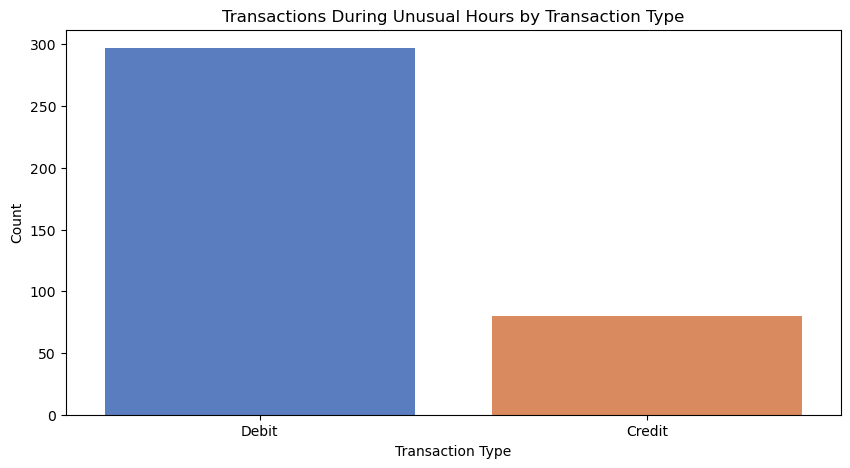

In [22]:
# Ensure TransactionDate is in datetime format and extract the hour
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')  
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Define unusual hours (outside 9 AM - 6 PM)
unusual_hours = list(range(0, 9)) + list(range(18, 24))

# Filter transactions during unusual hours
unusual_hour_transactions = df[df['TransactionHour'].isin(unusual_hours)]

print(f"Number of transactions during unusual hours: {len(unusual_hour_transactions)}")
display(unusual_hour_transactions.head())

# Visualize transactions during unusual hours by type
plt.figure(figsize=(10, 5))
sns.countplot(data=unusual_hour_transactions, x='TransactionType', palette='muted')
plt.title('Transactions During Unusual Hours by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

Number of transactions with time difference of less than 1 hour: 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,8217.09,16,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,Detroit,D000238,38.210.156.148,M017,Branch,28,Student,48,1,117.98,2024-11-04 08:08:18,-485.25,17,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,1539.67,17,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,8804.45,16,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,Sacramento,D000038,135.29.211.116,M018,Branch,69,Doctor,156,1,7885.21,2024-11-04 08:08:27,7787.48,17,2480.0


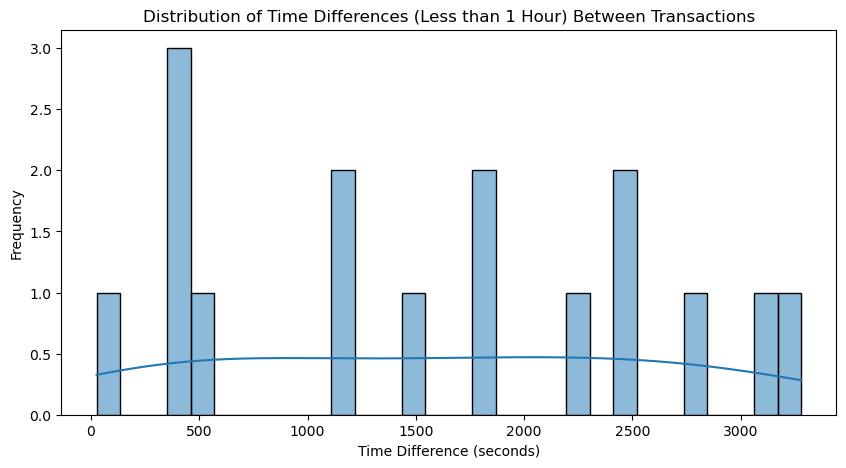

In [23]:
# Ensure TransactionDate is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Sort data by AccountID and TransactionDate for accurate time difference calculations
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate'])

# Calculate time difference between consecutive transactions for each account
df_sorted['TimeDifference'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

# Filter transactions with a time difference of less than 1 hour (3600 seconds)
rapid_transactions = df_sorted[df_sorted['TimeDifference'] <= 3600]

# Display the number of such transactions and a preview of the data
print(f"Number of transactions with time difference of less than 1 hour: {len(rapid_transactions)}")
display(rapid_transactions.head())

# Visualize the distribution of time differences for these transactions
plt.figure(figsize=(10, 5))
sns.histplot(rapid_transactions['TimeDifference'].dropna(), bins=30, kde=True)
plt.title('Distribution of Time Differences (Less than 1 Hour) Between Transactions')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()



Number of unusually high-value transactions: 62


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount
3,TX001282,AC00128,1397.59,2023-11-13 17:28:12,Credit,Austin,D000117,4.134.78.167,M020,ATM,26,Student,144,1,1134.79,2024-11-04 08:06:38,2532.38,17,460.698571
19,TX000219,AC00070,890.24,2023-07-07 18:03:43,Credit,Las Vegas,D000223,28.149.72.129,M029,Online,33,Engineer,161,1,5140.93,2024-11-04 08:07:32,6031.17,18,236.483750
58,TX000585,AC00150,992.17,2023-02-27 18:23:11,Debit,San Antonio,D000205,90.111.245.138,M007,ATM,43,Doctor,169,1,6215.96,2024-11-04 08:12:19,5223.79,18,290.080000
111,TX000312,AC00285,1221.65,2023-09-27 16:55:35,Debit,Denver,D000098,83.207.115.164,M091,Online,27,Student,153,1,243.92,2024-11-04 08:10:41,-977.73,16,405.224286
136,TX001134,AC00095,1432.02,2023-09-08 17:50:09,Debit,Louisville,D000263,105.87.212.115,M081,Branch,60,Retired,138,1,4315.07,2024-11-04 08:09:36,2883.05,17,397.733750


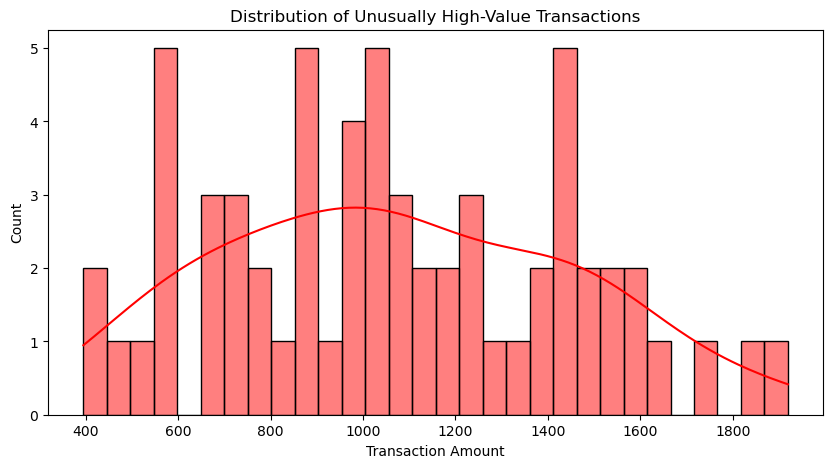

In [24]:
# Calculate average transaction amount per account
account_avg = df.groupby('AccountID')['TransactionAmount'].mean().reset_index().rename(columns={'TransactionAmount': 'AverageTransactionAmount'})
df = df.merge(account_avg, on='AccountID')
# Identify transactions that are 3 times above the average for the account
unusual_transactions = df[df['TransactionAmount'] > (df['AverageTransactionAmount'] * 3)]
print(f"Number of unusually high-value transactions: {len(unusual_transactions)}")
display(unusual_transactions.head())

# Plot unusually high transactions
plt.figure(figsize=(10, 5))
sns.histplot(unusual_transactions['TransactionAmount'], bins=30, kde=True, color='red')
plt.title('Distribution of Unusually High-Value Transactions')
plt.xlabel('Transaction Amount')
plt.show()


Number of accounts with high location variability: 1282


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,5098.12,16,460.698571,7
1,TX000402,AC00128,137.35,2023-03-29 18:12:17,Credit,Sacramento,D000051,37.213.85.222,M028,Online,40,Doctor,220,1,12662.66,2024-11-04 08:10:23,12800.01,18,460.698571,7
2,TX000488,AC00128,710.14,2023-03-08 16:20:43,Debit,El Paso,D000667,83.207.115.164,M059,ATM,26,Student,227,1,465.63,2024-11-04 08:12:20,-244.51,16,460.698571,7
3,TX001282,AC00128,1397.59,2023-11-13 17:28:12,Credit,Austin,D000117,4.134.78.167,M020,ATM,26,Student,144,1,1134.79,2024-11-04 08:06:38,2532.38,17,460.698571,7
4,TX001757,AC00128,34.67,2023-04-25 16:34:55,Debit,Chicago,D000321,78.100.105.143,M077,Online,19,Student,71,1,888.60,2024-11-04 08:11:38,853.93,16,460.698571,7


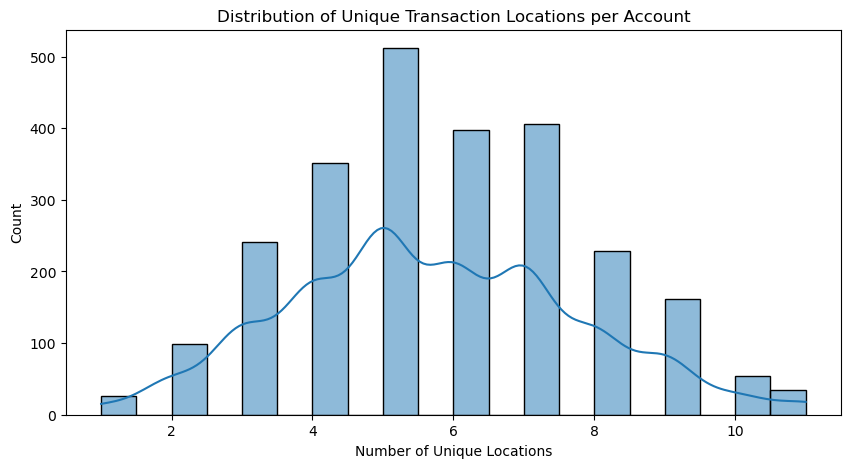

In [25]:
# Group by AccountID to count unique locations
location_pattern = df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location': 'UniqueLocationsCount'})
# Merge and identify accounts with high variability in transaction locations
df = df.merge(location_pattern, on='AccountID')
high_location_variability = df[df['UniqueLocationsCount'] > 5]
print(f"Number of accounts with high location variability: {len(high_location_variability)}")
display(high_location_variability.head())

# Plot distribution of unique location counts
plt.figure(figsize=(10, 5))
sns.histplot(df['UniqueLocationsCount'], bins=20, kde=True)
plt.title('Distribution of Unique Transaction Locations per Account')
plt.xlabel('Number of Unique Locations')
plt.show()


  Channel TransactionType  Count
0     ATM          Credit     73
1     ATM           Debit    760
2  Branch          Credit    251
3  Branch           Debit    617
4  Online          Credit    244
5  Online           Debit    567


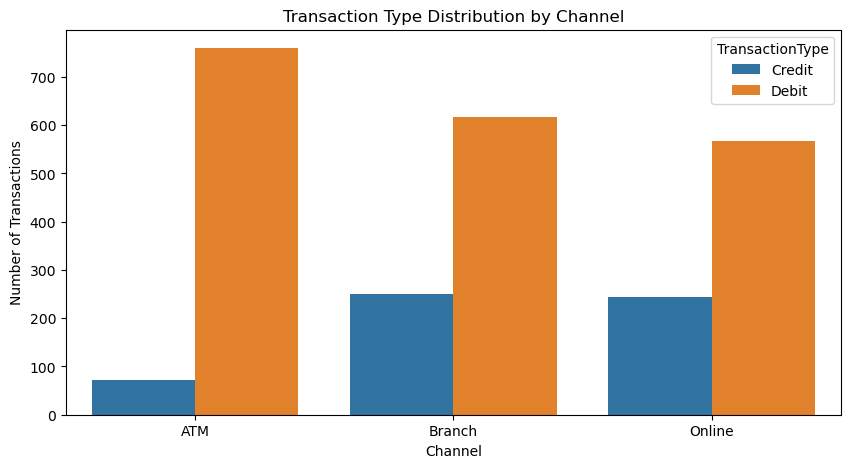

In [26]:
# Analyze fraud likelihood by channel and transaction type
channel_analysis = df.groupby(['Channel', 'TransactionType'])['TransactionID'].count().reset_index()
channel_analysis.columns = ['Channel', 'TransactionType', 'Count']
print(channel_analysis)

# Plot distribution of transactions by channel and type
plt.figure(figsize=(10, 5))
sns.barplot(data=channel_analysis, x='Channel', y='Count', hue='TransactionType')
plt.title('Transaction Type Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.show()


Number of devices used for multiple accounts: 609


,DeviceID,UniqueAccounts
0,D000001,4
1,D000002,5
2,D000003,2
3,D000004,4
4,D000005,6
...,...,...
676,D000696,2
677,D000697,9
678,D000698,3
679,D000699,2


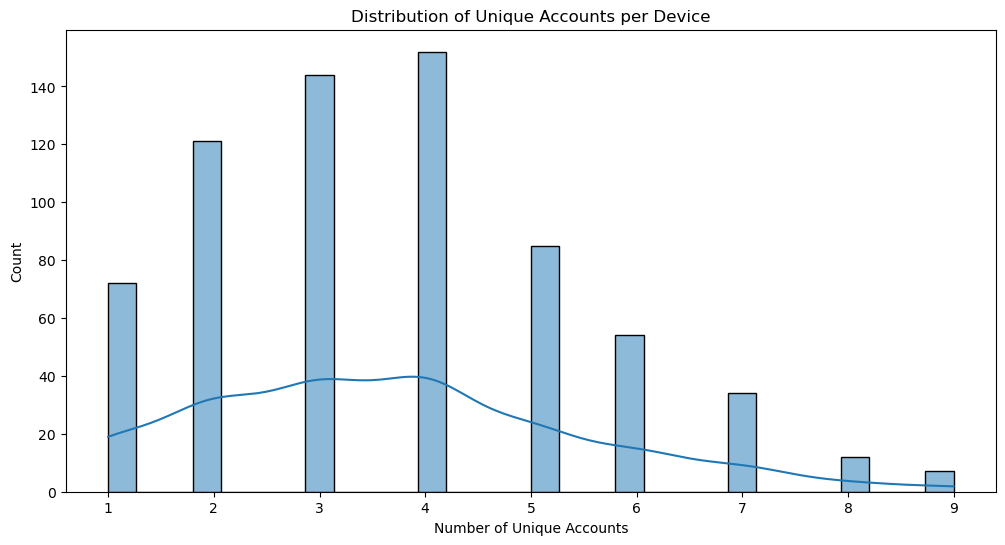

In [28]:
# Multiple Accounts Using the Same Device
# Count unique accounts per DeviceID
device_account_counts = df.groupby('DeviceID')['AccountID'].nunique().reset_index().rename(columns={'AccountID': 'UniqueAccounts'})
# Identify devices associated with more than one account
suspicious_devices = device_account_counts[device_account_counts['UniqueAccounts'] > 1]
print(f"Number of devices used for multiple accounts: {len(suspicious_devices)}")
display(suspicious_devices)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(device_account_counts['UniqueAccounts'], bins=30, kde=True)
plt.title('Distribution of Unique Accounts per Device')
plt.xlabel('Number of Unique Accounts')
plt.show()

Number of IP addresses used by multiple accounts: 552


,IP Address,UniqueAccounts
0,1.198.76.182,8
1,1.238.163.61,3
2,1.7.29.72,2
3,1.98.25.114,3
4,10.144.131.89,3


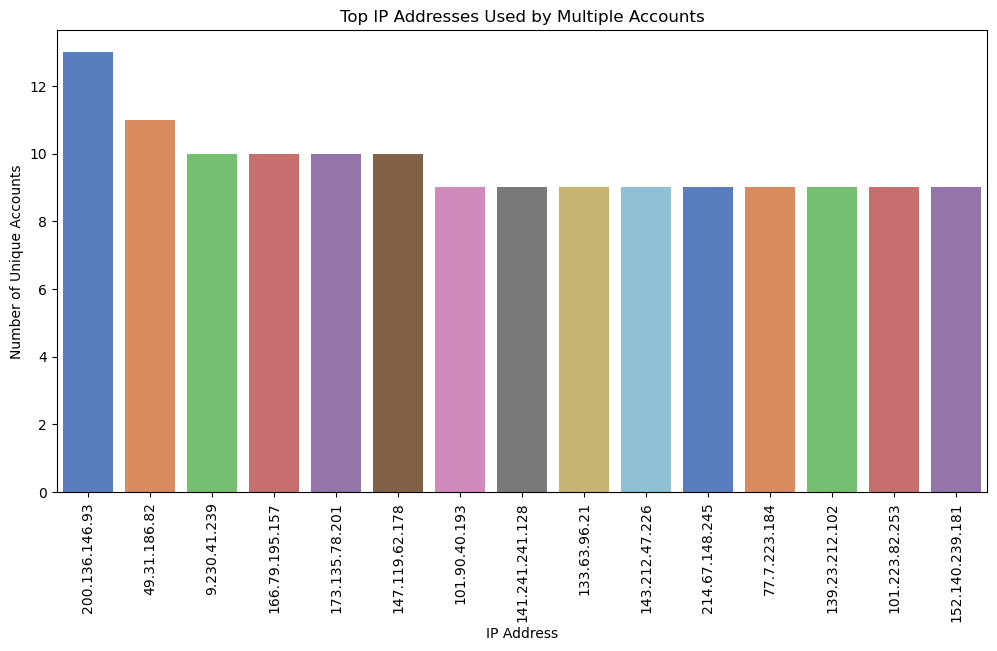

In [29]:
# Multiple Accounts Using the Same IP Address
ip_counts = df.groupby('IP Address')['AccountID'].nunique().reset_index()
ip_counts.columns = ['IP Address', 'UniqueAccounts']
shared_ips = ip_counts[ip_counts['UniqueAccounts'] > 1]
print(f"Number of IP addresses used by multiple accounts: {len(shared_ips)}")
display(shared_ips.head())

# Bar Plot: Top IP addresses used by multiple accounts
plt.figure(figsize=(12, 6))
top_shared_ips = shared_ips.sort_values(by='UniqueAccounts', ascending=False).head(15)  # Display top 15 for clarity
sns.barplot(x=top_shared_ips['IP Address'], y=top_shared_ips['UniqueAccounts'], palette='muted')
plt.title('Top IP Addresses Used by Multiple Accounts')
plt.xlabel('IP Address')
plt.ylabel('Number of Unique Accounts')
plt.xticks(rotation=90)
plt.show()

Number of long-duration transactions (above 259.5708259512188 seconds): 142


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount
41,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55,2967.66,17,231.082857,6
42,TX000373,AC00069,157.37,2023-11-15 16:54:44,Credit,Dallas,D000001,66.23.166.248,M014,Branch,42,Doctor,289,1,13964.31,2024-11-04 08:10:30,14121.68,16,231.082857,6
52,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,77,Retired,296,1,2042.22,2024-11-04 08:11:44,1068.83,17,591.600000,7
72,TX000479,AC00392,334.89,2023-07-20 18:23:13,Debit,Fort Worth,D000697,32.13.122.242,M040,Online,21,Student,260,1,1661.68,2024-11-04 08:08:44,1326.79,18,288.113333,3
77,TX000455,AC00264,611.11,2023-10-18 18:32:31,Debit,Detroit,D000215,141.201.46.191,M045,ATM,20,Student,282,4,919.84,2024-11-04 08:11:12,308.73,18,441.255000,6


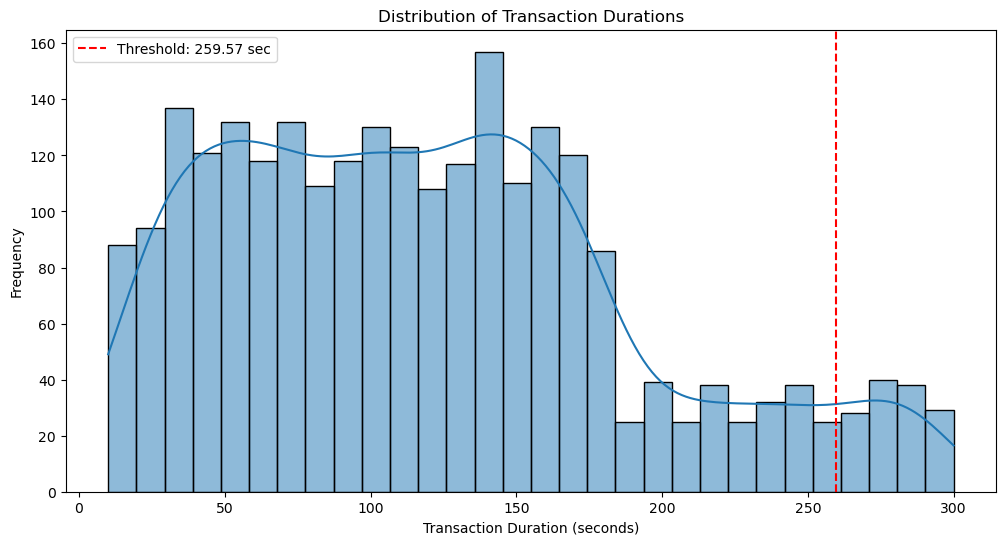

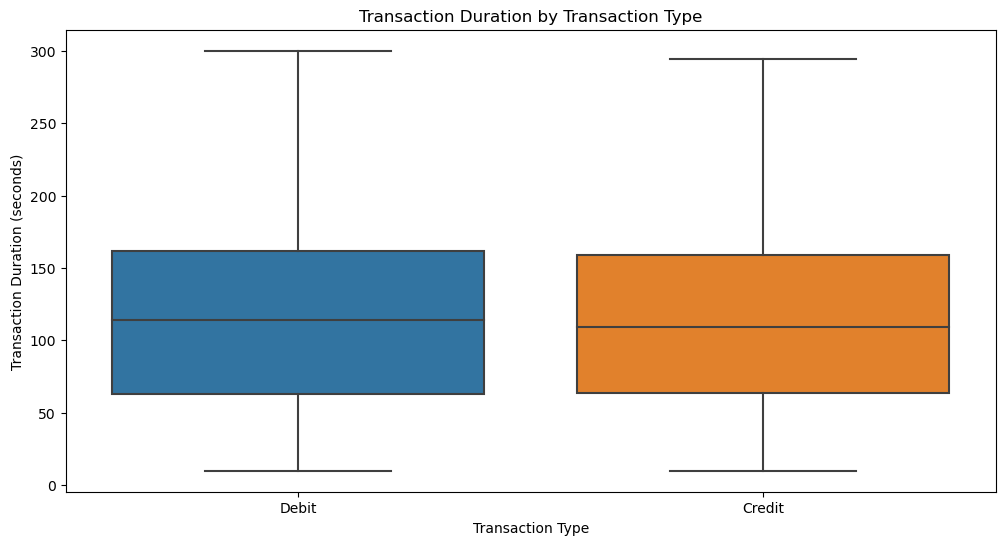

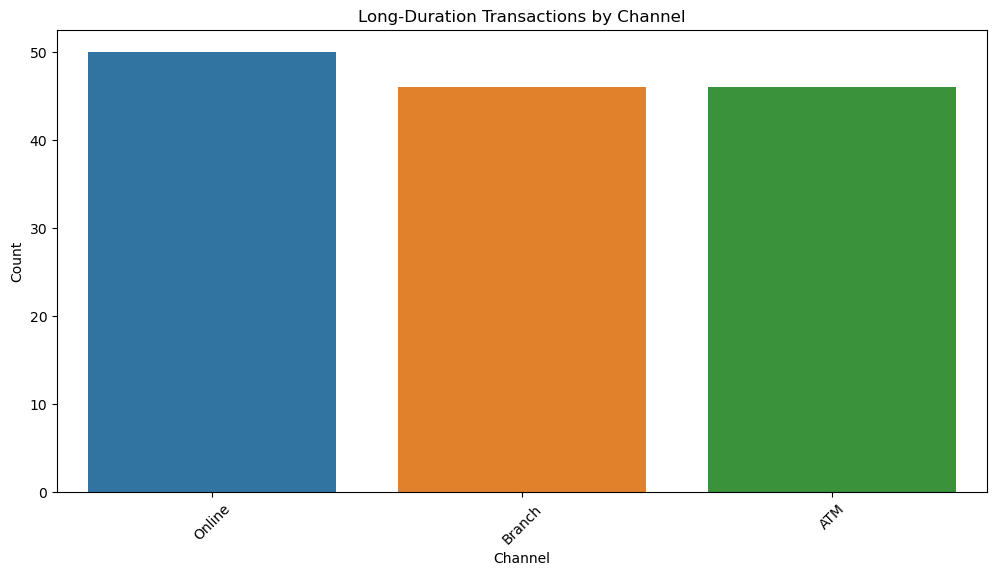

In [31]:
# Calculate summary statistics for TransactionDuration
duration_mean = df['TransactionDuration'].mean()
duration_std = df['TransactionDuration'].std()
long_duration_threshold = duration_mean + 2 * duration_std

# Identify long-duration transactions
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f"Number of long-duration transactions (above {long_duration_threshold} seconds): {len(long_duration_transactions)}")
display(long_duration_transactions.head())

# Visualize distribution of TransactionDuration
plt.figure(figsize=(12, 6))
sns.histplot(df['TransactionDuration'], bins=30, kde=True)
plt.axvline(long_duration_threshold, color='r', linestyle='--', label=f'Threshold: {long_duration_threshold:.2f} sec')
plt.title('Distribution of Transaction Durations')
plt.xlabel('Transaction Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Boxplot to visualize potential outliers in TransactionDuration
plt.figure(figsize=(12, 6))
sns.boxplot(x='TransactionType', y='TransactionDuration', data=df)
plt.title('Transaction Duration by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Duration (seconds)')
plt.show()

# Additional exploration: Long-duration transactions by Channel
plt.figure(figsize=(12, 6))
sns.countplot(data=long_duration_transactions, x='Channel', order=long_duration_transactions['Channel'].value_counts().index)
plt.title('Long-Duration Transactions by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# <span style="color:transparent;">Anomaly Detection</span>

<div style="border-radius: 15px 0 15px 0px; border: 2px solid #ff4500; padding: 10px; background-color: #ffe4e1; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #ff4500; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 24px;">Anomaly Detection</h1>
</div>

## Identifying Potential Frauds with K-means Clustering 🔍

In [33]:
# Select features for clustering
features = ['TransactionAmount', 'TransactionDuration'] 
X = df[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 10)  # Test for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


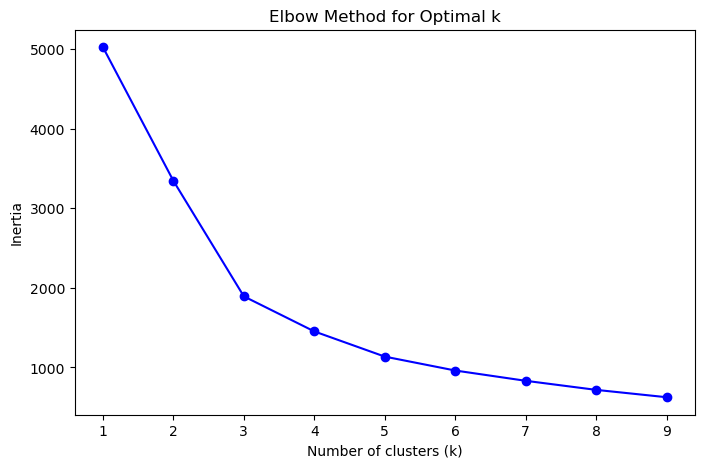

In [34]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [35]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Assign clusters and calculate distance to cluster centroid
df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid
2,TX000488,AC00128,710.14,2023-03-08 16:20:43,Debit,El Paso,D000667,83.207.115.164,M059,ATM,...,227,1,465.63,2024-11-04 08:12:20,-244.51,16,460.698571,7,0,1.644517
3,TX001282,AC00128,1397.59,2023-11-13 17:28:12,Credit,Austin,D000117,4.134.78.167,M020,ATM,...,144,1,1134.79,2024-11-04 08:06:38,2532.38,17,460.698571,7,0,2.033222
52,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,...,296,1,2042.22,2024-11-04 08:11:44,1068.83,17,591.600000,7,0,2.644915
55,TX002202,AC00385,1431.54,2023-12-11 16:23:59,Debit,Portland,D000490,68.254.244.208,M075,Online,...,84,1,1171.98,2024-11-04 08:08:41,-259.56,16,591.600000,7,0,2.151976
77,TX000455,AC00264,611.11,2023-10-18 18:32:31,Debit,Detroit,D000215,141.201.46.191,M045,ATM,...,282,4,919.84,2024-11-04 08:11:12,308.73,18,441.255000,6,2,1.959599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,TX001549,AC00172,870.30,2023-08-28 17:56:39,Debit,San Jose,D000200,143.212.47.226,M003,ATM,...,229,1,3688.98,2024-11-04 08:08:54,2818.68,17,580.998000,3,0,1.642343
2464,TX001707,AC00048,1283.97,2023-08-09 17:32:04,Debit,Colorado Springs,D000340,4.134.78.167,M030,ATM,...,121,1,11041.90,2024-11-04 08:07:52,9757.93,17,534.090000,3,0,1.603186
2480,TX001797,AC00146,1135.80,2023-09-06 16:03:15,Debit,San Diego,D000485,16.131.3.140,M004,ATM,...,250,1,13534.30,2024-11-04 08:07:14,12398.50,16,585.890000,2,0,2.220049
2505,TX002118,AC00186,257.60,2023-12-18 16:30:46,Credit,Fort Worth,D000576,40.244.94.218,M004,Online,...,293,1,7950.74,2024-11-04 08:09:57,8208.34,16,228.415000,2,2,1.518234


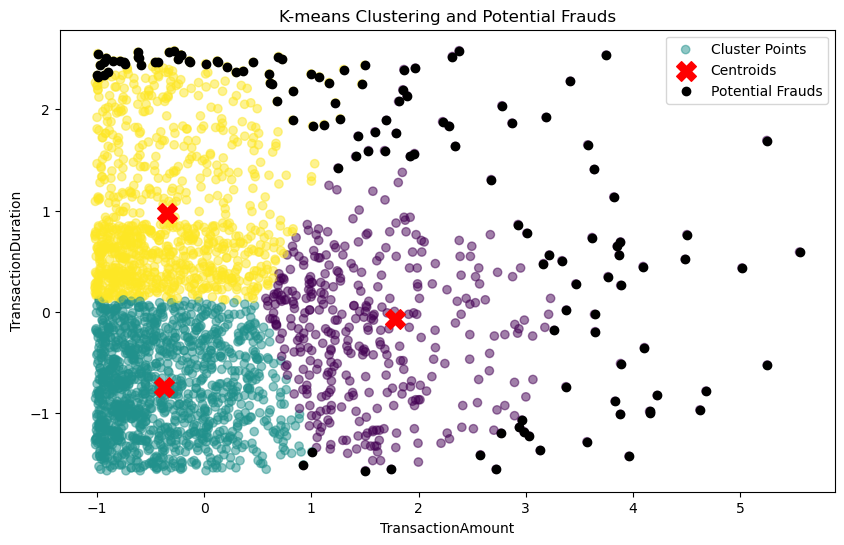

In [36]:
# Visualize clusters and potential frauds (2D plot for simplicity with legend)
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
frauds = plt.scatter(X_scaled[potential_frauds.index, 0], X_scaled[potential_frauds.index, 1], c='black', label='Potential Frauds', edgecolors='k')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.show()


## DBSCAN Clustering for Anomaly Detection 🧩

In [37]:
# Map the cluster labels to descriptive names
label_mapping = {
    -1: 'Fraud (Outliers)',  # Default noise label for DBSCAN
    0: 'Normal',
    1: 'Suspicious Group 1',
    2: 'Suspicious Group 2',
    3: 'Suspicious Group 3',
    4: 'Suspicious Group 4',
}

# Select relevant features for DBSCAN 
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
X = df[features].copy()

X = X.fillna(X.mean())

# Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  
dbscan.fit(X_scaled)

# Add labels to the dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Map cluster labels to descriptive names
df['Cluster_Description'] = df['DBSCAN_Cluster'].map(label_mapping)

# Identify outliers (noise points) labeled as -1
potential_frauds = df[df['DBSCAN_Cluster'] == -1]
print(f"Number of potential frauds detected by DBSCAN: {len(potential_frauds)}")
display(potential_frauds.head())


Number of potential frauds detected by DBSCAN: 17


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description
77,TX000455,AC00264,611.11,2023-10-18 18:32:31,Debit,Detroit,D000215,141.201.46.191,M045,ATM,...,919.84,2024-11-04 08:11:12,308.73,18,441.255000,6,2,1.959599,-1,Fraud (Outliers)
272,TX000694,AC00011,733.29,2023-03-15 18:42:16,Debit,Virginia Beach,D000618,16.51.235.240,M032,ATM,...,10427.00,2024-11-04 08:07:12,9693.71,18,348.322857,5,0,0.412861,-1,Fraud (Outliers)
436,TX002150,AC00110,1250.94,2023-02-28 17:45:06,Debit,Columbus,D000282,35.67.21.23,M054,ATM,...,11565.97,2024-11-04 08:08:33,10315.03,17,313.471250,8,0,1.491818,-1,Fraud (Outliers)
554,TX001802,AC00018,331.32,2023-06-05 17:24:29,Debit,Sacramento,D000334,200.164.13.160,M078,Branch,...,13054.54,2024-11-04 08:07:35,12723.22,17,552.890000,3,2,0.863336,-1,Fraud (Outliers)
565,TX001214,AC00170,1192.20,2023-12-21 16:21:27,Credit,Jacksonville,D000174,40.10.25.102,M093,Branch,...,7816.41,2024-11-04 08:09:14,9008.61,16,247.325714,6,0,1.297447,-1,Fraud (Outliers)


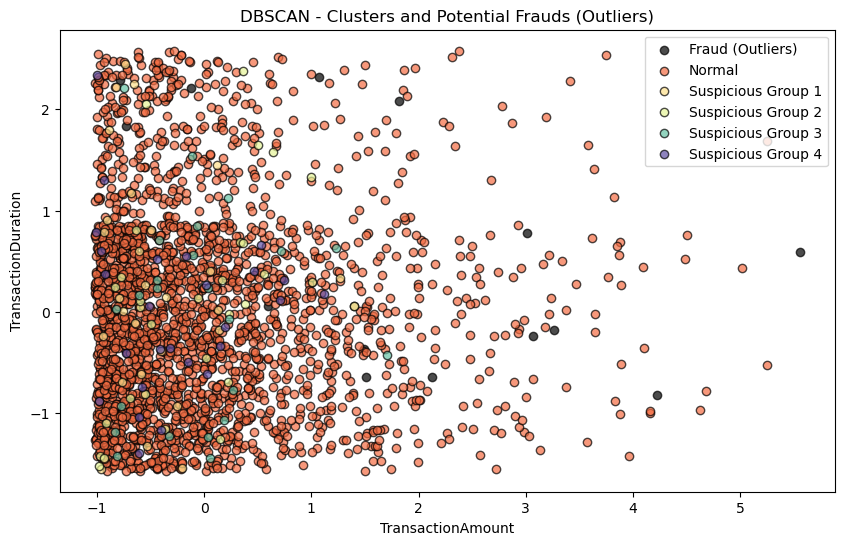

In [38]:
# Visualize clusters and potential frauds
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise (outliers)
        col = [0, 0, 0, 1]  
    class_member_mask = (dbscan.labels_ == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), edgecolor='k', alpha=0.7, label=label_mapping.get(k, f'Cluster {k}'))

plt.title('DBSCAN - Clusters and Potential Frauds (Outliers)')
plt.xlabel(features[0])  # TransactionAmount
plt.ylabel(features[1])  # TransactionDuration
plt.legend()
plt.show()

## Isolation Forest for Anomaly Detection 🌲

In [39]:
# Define outlier mapping
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}

# Select relevant features for fraud detection
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']  # Modify as needed
X = df[features].copy()

X = X.fillna(X.mean())

# Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

# Predict anomalies
df['AnomalyScore'] = iso_forest.decision_function(X_scaled)
df['IsAnomaly'] = iso_forest.predict(X_scaled)  

# Map results to descriptive labels
df['AnomalyLabel'] = df['IsAnomaly'].map(outlier_mapping)

# Filter out detected anomalies
potential_frauds = df[df['IsAnomaly'] == -1]
print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description,AnomalyScore,IsAnomaly,AnomalyLabel
22,TX001255,AC00070,142.19,2023-06-15 18:28:50,Debit,Houston,D000416,85.191.79.161,M005,Branch,...,18,236.483750,7,1,0.608623,1,Suspicious Group 1,-0.043784,-1,Potential Fraud
34,TX000666,AC00393,152.18,2023-08-07 16:57:22,Credit,Los Angeles,D000637,40.244.94.218,M093,Online,...,16,209.206250,7,2,0.224992,1,Suspicious Group 1,-0.023897,-1,Potential Fraud
42,TX000373,AC00069,157.37,2023-11-15 16:54:44,Credit,Dallas,D000001,66.23.166.248,M014,Branch,...,16,231.082857,6,2,1.451872,0,Normal,-0.001418,-1,Potential Fraud
52,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,...,17,591.600000,7,0,2.644915,0,Normal,-0.031425,-1,Potential Fraud
59,TX000608,AC00150,32.54,2023-07-04 16:25:35,Debit,Oklahoma City,D000008,4.101.189.38,M022,Online,...,16,290.080000,7,2,0.562217,1,Suspicious Group 1,-0.029592,-1,Potential Fraud


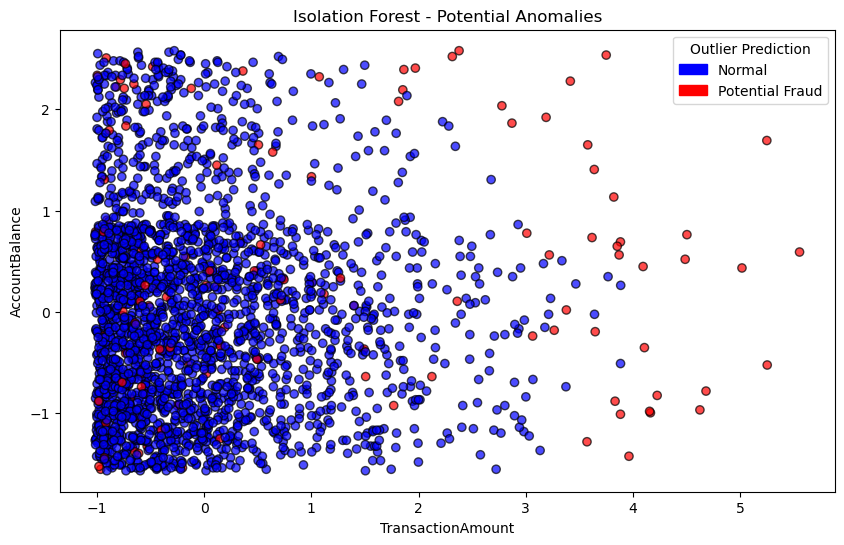

In [40]:
colors = np.where(df['IsAnomaly'] == -1, 'r', 'b')  

# Visualize potential frauds (TransactionAmount vs AccountBalance)
plt.figure(figsize=(10, 6))
plt.scatter(
    X_scaled[:, 0], 
    X_scaled[:, 1], 
    c=colors, 
    cmap='coolwarm', 
    alpha=0.7, 
    edgecolors='k', 
    label='Data Points'
)

# Custom legend
import matplotlib.patches as mpatches
normal_patch = mpatches.Patch(color='b', label='Normal')
fraud_patch = mpatches.Patch(color='r', label='Potential Fraud')
plt.legend(handles=[normal_patch, fraud_patch], title='Outlier Prediction')

plt.title('Isolation Forest - Potential Anomalies')
plt.xlabel(features[0])  # TransactionAmount
plt.ylabel(features[2])  # AccountBalance
plt.show()